### Part A

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

## Data Extration and Exploration

In [2]:
df = pd.read_csv('CE802_P3_Data.csv')

In [3]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,27.88,1596.99,191.21,Europe,-9.07,-935.98,9.98,53.00,-7.44,26.68,...,617.07,71.52,-30139.68,0.07,-115.89,-213.84,11.58,24.06,2,-8.93
1,165.00,2900.79,206.84,Rest,-32.42,-581.94,15.30,52.70,-9.80,37.14,...,643.38,80.52,-16725.63,3.07,-149.07,-88.00,2.76,25.92,4,377.83
2,229.96,2677.29,180.04,Rest,-17.40,-393.22,12.44,49.66,-11.23,22.44,...,2735.28,67.64,-16419.12,2.19,80.40,-168.06,1.18,34.80,3,252.40
3,264.86,2508.93,161.19,UK,-3.77,-2271.72,16.60,50.36,-14.80,27.86,...,6795.81,71.78,-17932.92,0.01,-113.37,-285.06,4.86,15.75,6,308.26
4,139.84,3418.35,187.50,UK,-11.51,-1111.60,16.83,53.30,-15.05,25.34,...,-890.07,71.64,-23304.93,0.00,-158.13,-208.06,10.88,6.36,4,81.85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1400 non-null   float64
 1   F2      1400 non-null   float64
 2   F3      1400 non-null   float64
 3   F4      1400 non-null   object 
 4   F5      1400 non-null   float64
 5   F6      1400 non-null   float64
 6   F7      1400 non-null   float64
 7   F8      1400 non-null   float64
 8   F9      1400 non-null   float64
 9   F10     1400 non-null   float64
 10  F11     1400 non-null   float64
 11  F12     1400 non-null   float64
 12  F13     1400 non-null   float64
 13  F14     1400 non-null   float64
 14  F15     1400 non-null   float64
 15  F16     1400 non-null   object 
 16  F17     1400 non-null   float64
 17  F18     1400 non-null   int64  
 18  F19     1400 non-null   float64
 19  F20     1400 non-null   float64
 20  F21     1400 non-null   float64
 21  F22     1400 non-null   float64
 22  

In [5]:
df.shape

(1400, 35)

In [6]:
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
Target    0
dtype: int64

In [7]:
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
Target    0
dtype: int64

In [8]:
df.duplicated().sum()

0

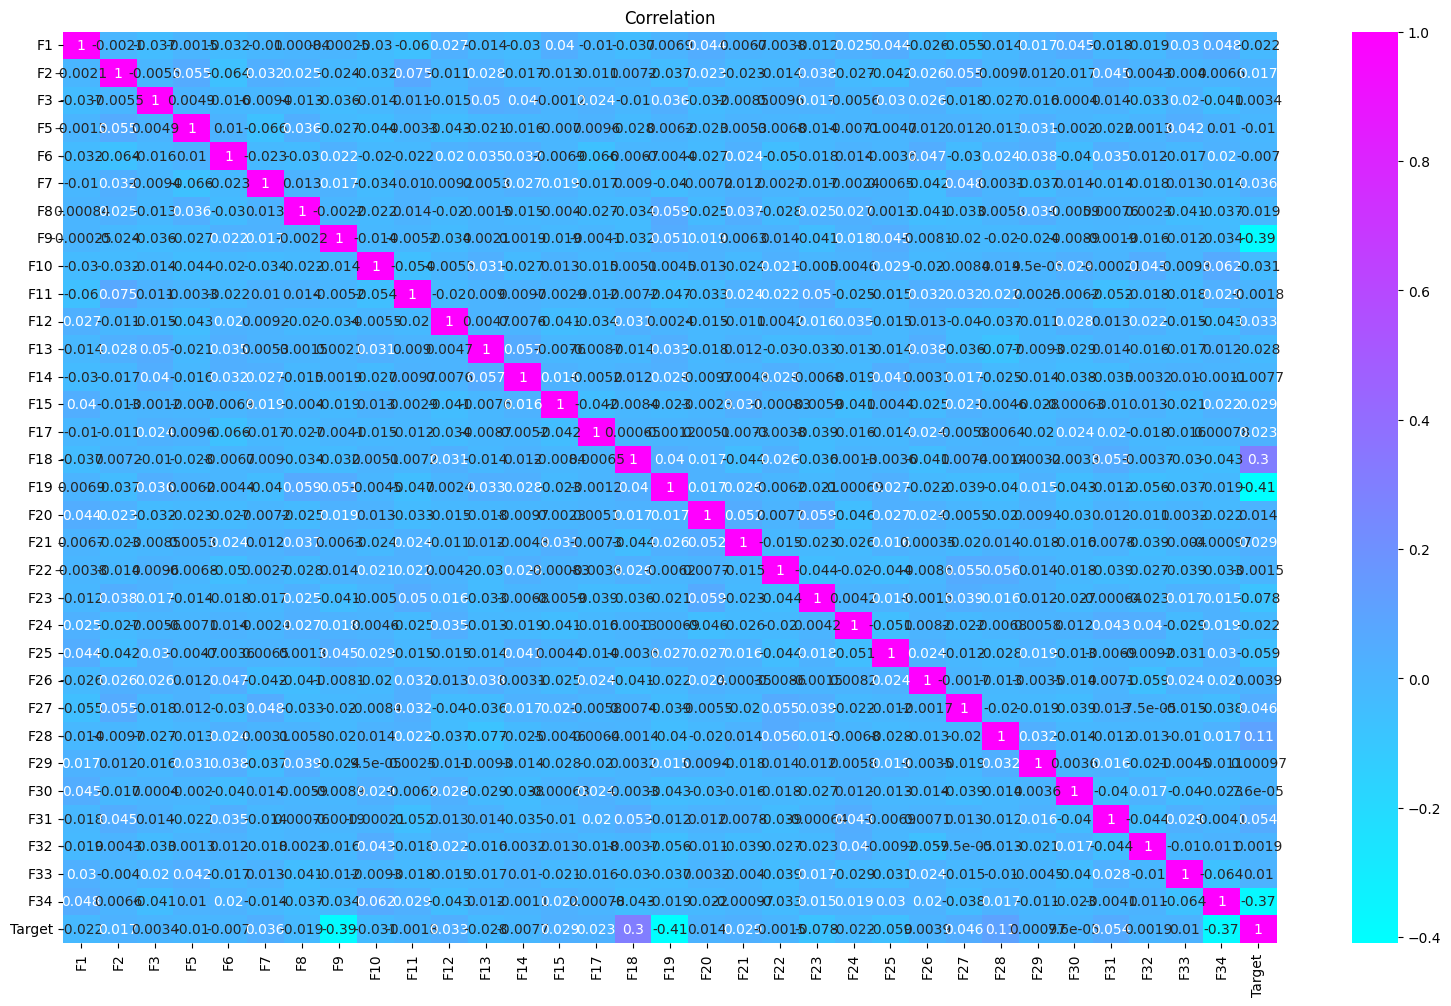

In [9]:
figure = plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.title('Correlation')
plt.show()

In [10]:
print(df.select_dtypes(include=['object','bool']).columns.to_list())

['F4', 'F16']


### Encoding Categorical Columns

In [11]:
lab = LabelEncoder()
df['F4'] = lab.fit_transform(df[['F4']])
df['F16'] = lab.fit_transform(df[['F16']])

### Box plot for detecting outliers

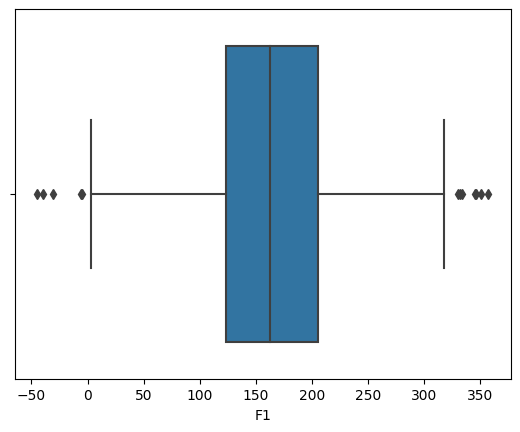

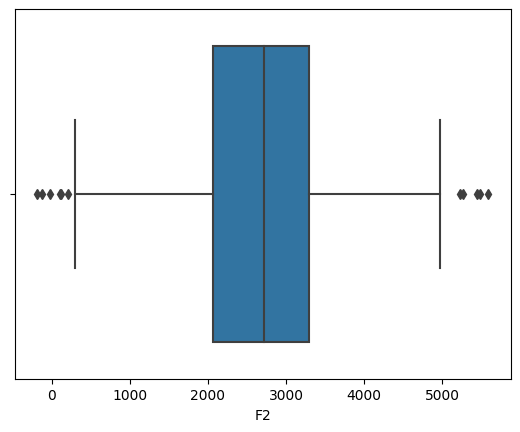

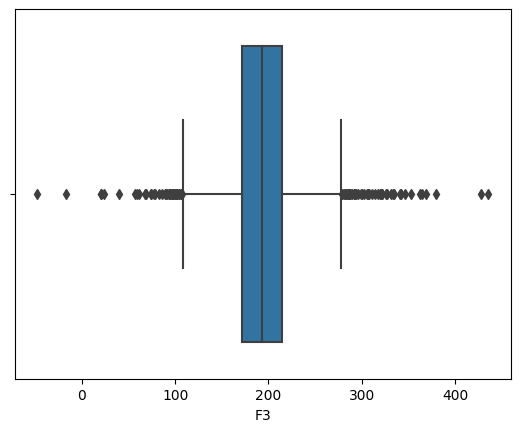

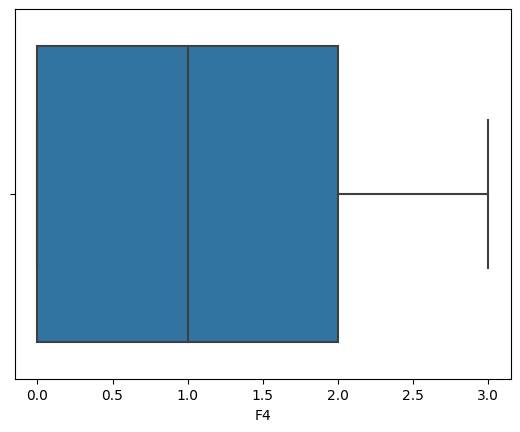

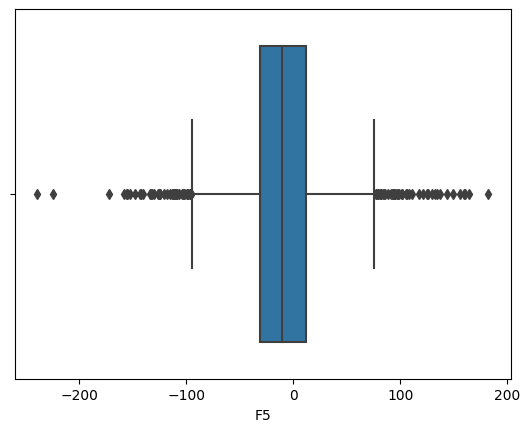

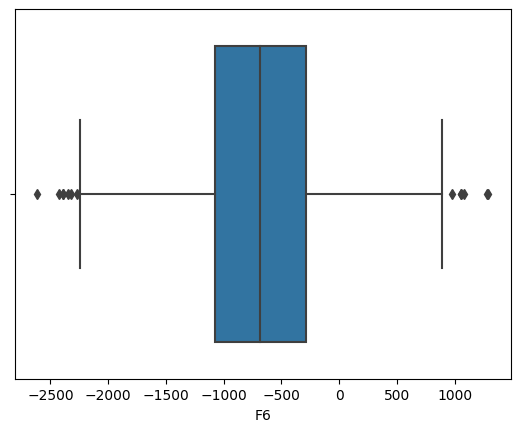

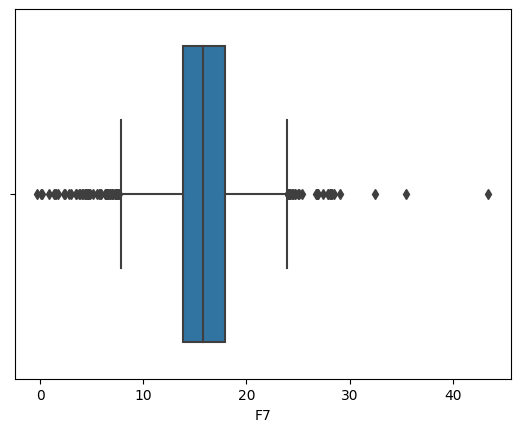

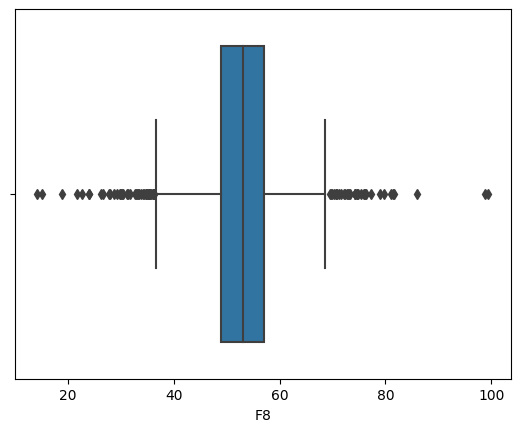

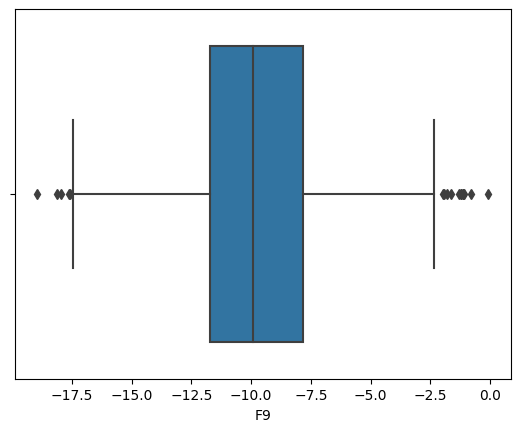

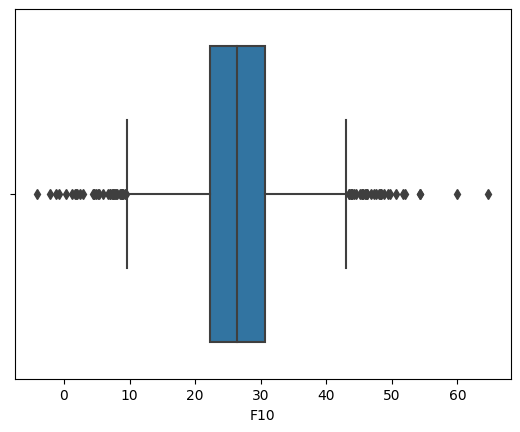

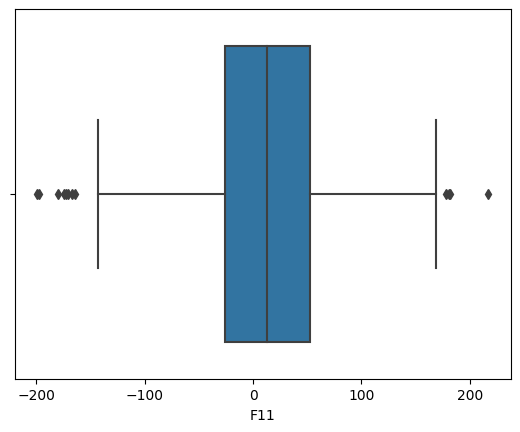

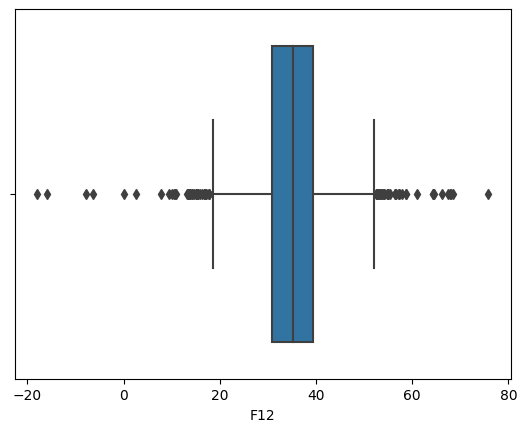

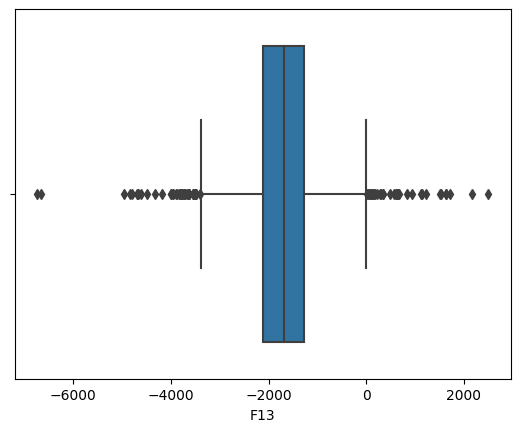

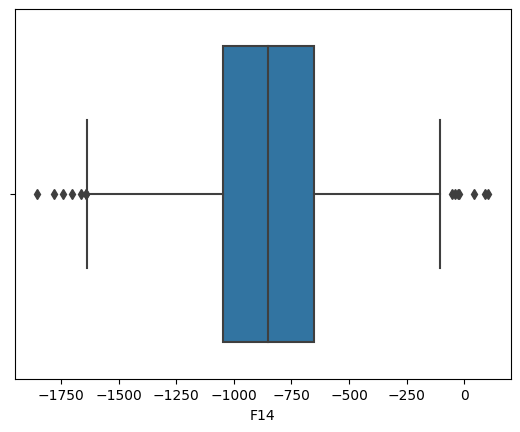

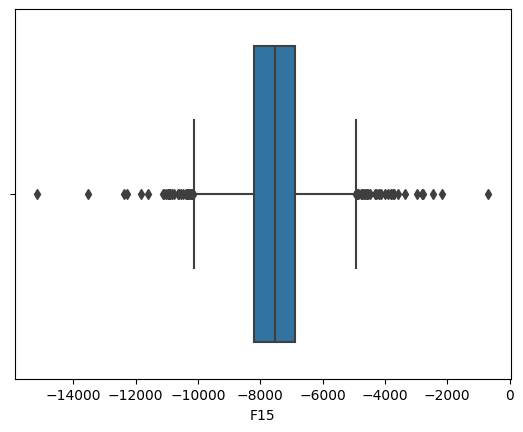

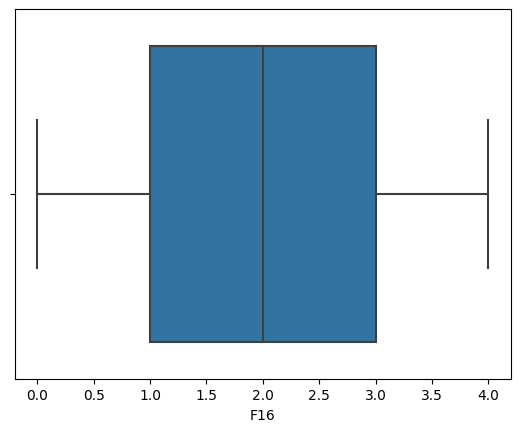

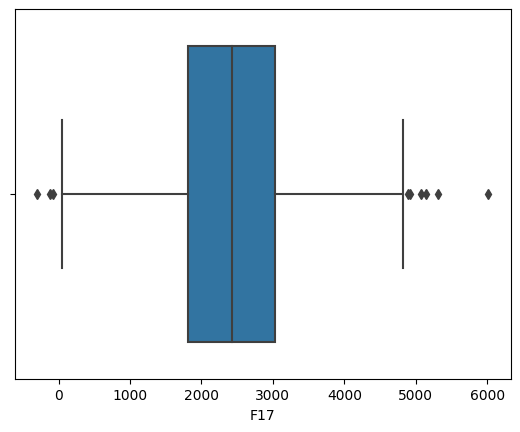

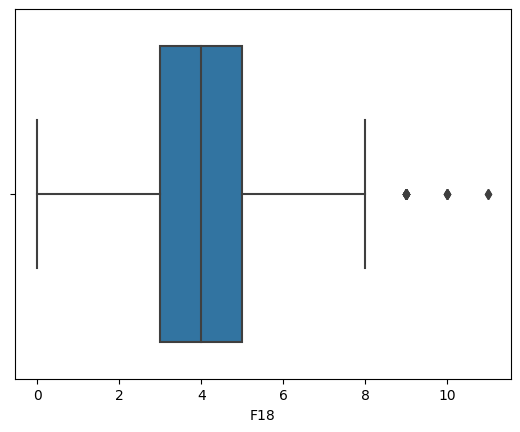

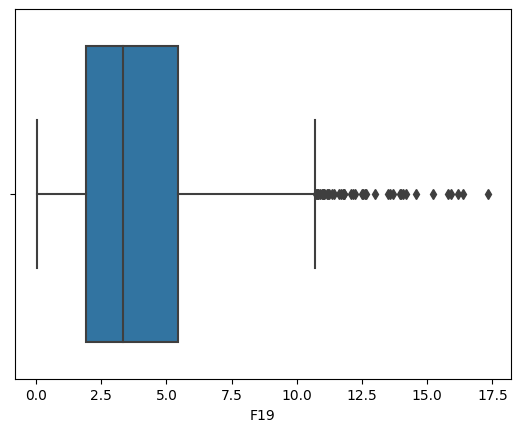

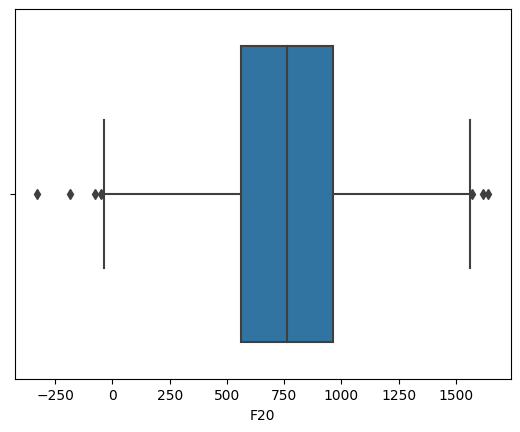

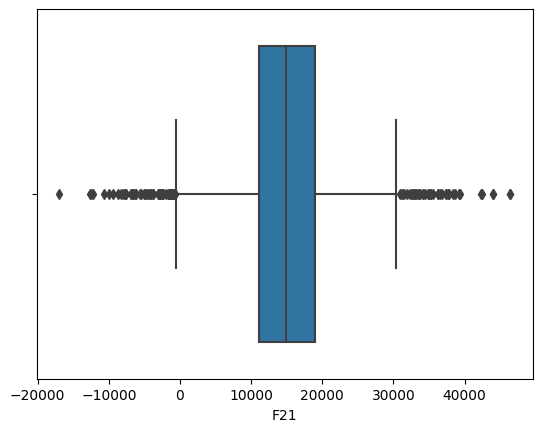

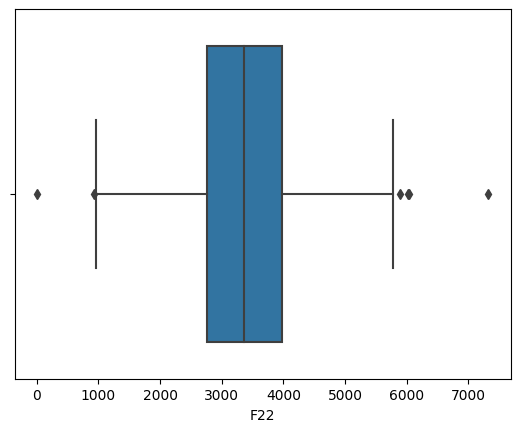

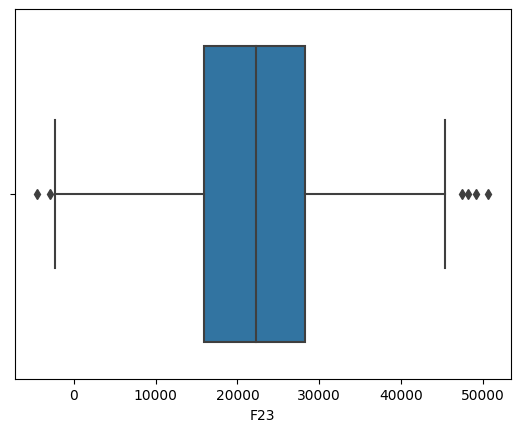

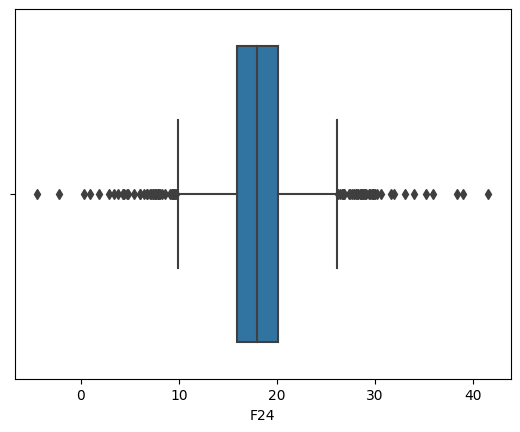

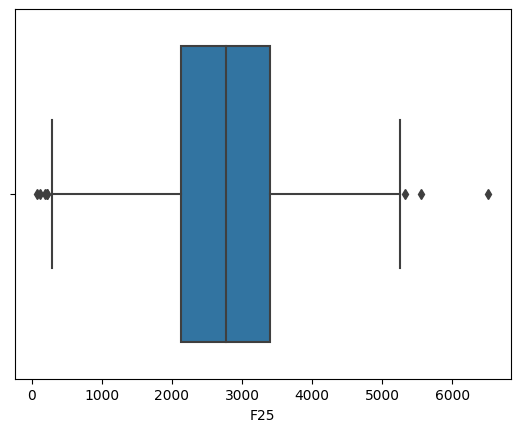

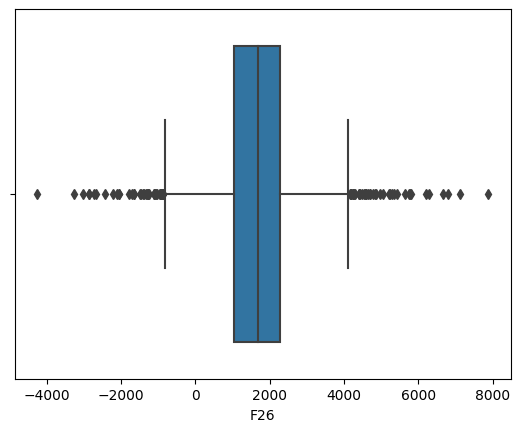

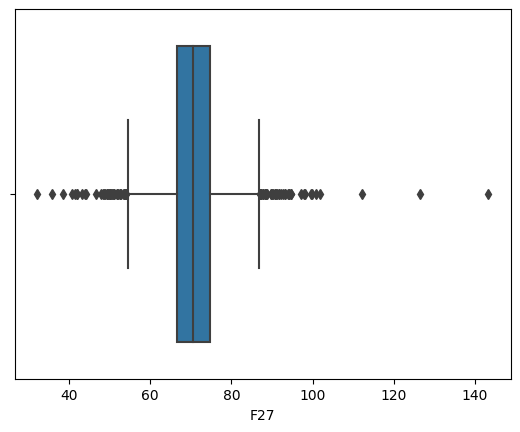

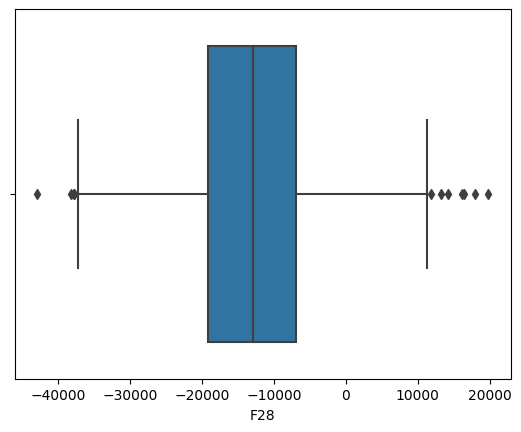

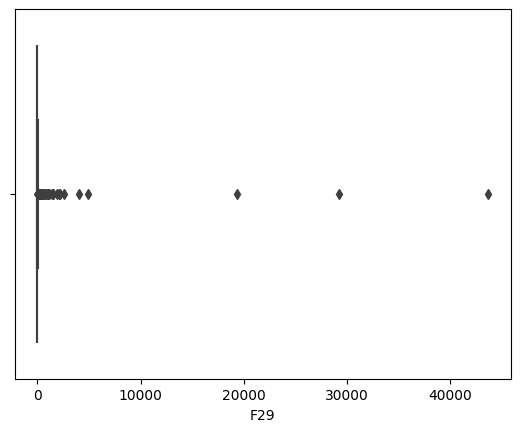

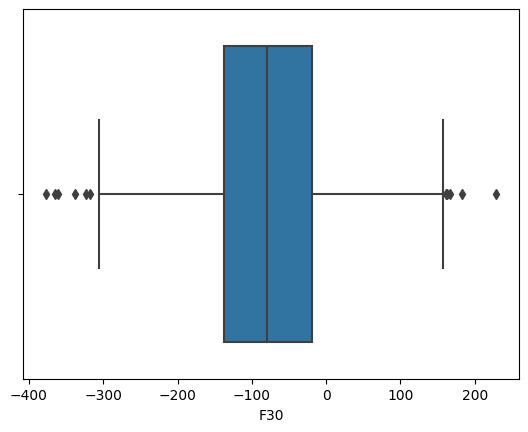

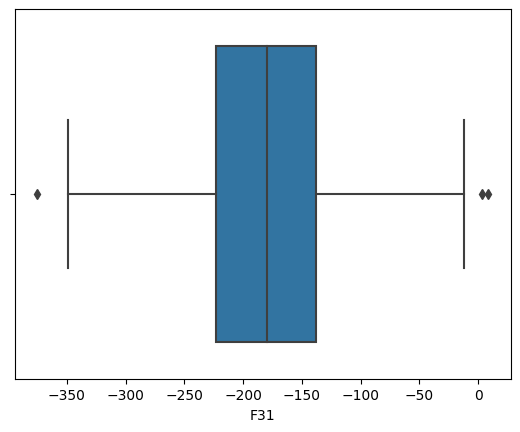

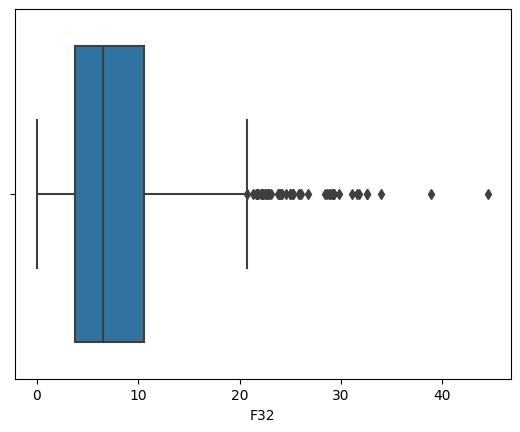

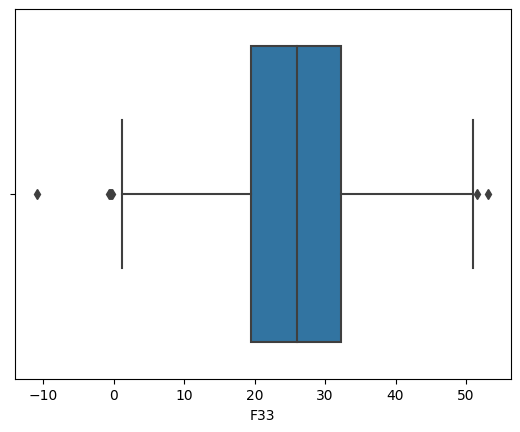

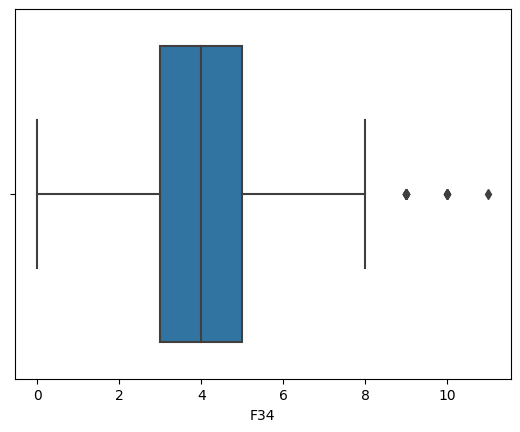

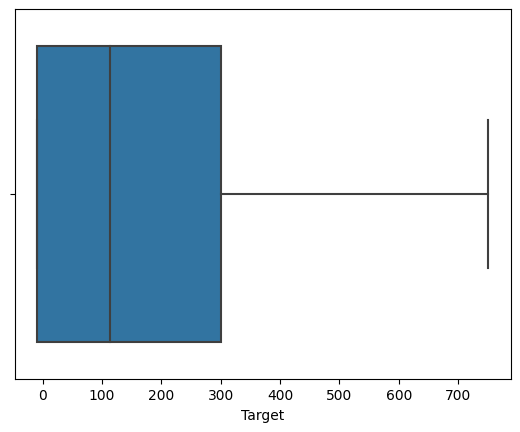

In [12]:
for i in df:
  sns.boxplot(x=df[i])
  plt.show();

### Removing Outliers

In [13]:
def remove_outliers(colu):
  sorted(colu)
  Q1,Q3 = colu.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_limit = Q1 - (1.5*IQR)
  upper_limit = Q3 + (1.5*IQR)
  return lower_limit, upper_limit

In [14]:
for i in df:
  low_limit_col, up_limit_col = remove_outliers(df[i])
  df[i] = np.where(df[i] > up_limit_col, up_limit_col, df[i])
  df[i] = np.where(df[i] < low_limit_col, low_limit_col, df[i])

## Spiliting Data

In [15]:
y = df['Target']
X = df.drop('Target', axis = 1)

In [16]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34
0,27.88,1596.99,191.21,0.0,-9.07,-935.980,9.98,53.00,-7.44,26.68,...,2264.43,617.07,71.52,-30139.68,0.07,-115.89,-213.84,11.58,24.06,2.0
1,165.00,2900.79,206.84,1.0,-32.42,-581.940,15.30,52.70,-9.80,37.14,...,3130.56,643.38,80.52,-16725.63,3.07,-149.07,-88.00,2.76,25.92,4.0
2,229.96,2677.29,180.04,1.0,-17.40,-393.220,12.44,49.66,-11.23,22.44,...,3927.57,2735.28,67.64,-16419.12,2.19,80.40,-168.06,1.18,34.80,3.0
3,264.86,2508.93,161.19,2.0,-3.77,-2265.155,16.60,50.36,-14.80,27.86,...,2380.95,4154.25,71.78,-17932.92,0.01,-113.37,-285.06,4.86,15.75,6.0
4,139.84,3418.35,187.50,2.0,-11.51,-1111.600,16.83,53.30,-15.05,25.34,...,3905.46,-844.47,71.64,-23304.93,0.00,-158.13,-208.06,10.88,6.36,4.0


In [17]:
min_max_scaler = MinMaxScaler()
scaled_X = min_max_scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

## Linear Regression

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
pred_test = reg.predict(X_test)
print('Accuracy score on testing set', r2_score(y_test, pred_test))

Accuracy score on testing set 0.5857535670657383


## Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor(n_estimators=100, max_depth=42)
random_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=42)

In [22]:
pred_rf = random_reg.predict(X_test)
print('R2 Score score on testing set', r2_score(y_test, pred_rf))
print('RMSE', sqrt(mean_squared_error(y_test, pred_rf)))

R2 Score score on testing set 0.695378020478104
RMSE 119.67481457304474


## K Nearest Neighbor

In [23]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 18)

model.fit(X_train, y_train)  

KNeighborsRegressor(n_neighbors=18)

In [24]:
pred=model.predict(X_test) #make prediction on test set
print('RMSE', sqrt(mean_squared_error(y_test,pred)))
print('R2 Score score on testing set', r2_score(y_test, pred))

RMSE 181.23684850003625
R2 Score score on testing set 0.30136761591365435


### Part B

## Applying Best model on test dataset

In [25]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

test_data['F4'] = lab.fit_transform(test_data[['F4']])
test_data['F16'] = lab.fit_transform(test_data[['F16']])
predicted = random_reg.predict(test_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])